In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
df = pd.read_csv("EasyVisa.csv")

df.shape

(25480, 12)

#### Data Cleaning

In [56]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().maen()*100, 5), "% missing values")

In [57]:
features_with_na

[]

In [58]:
df.duplicated().sum()

0

In [59]:
df.drop("case_id", inplace=True, axis=1)

In [60]:
df.shape

(25480, 11)

In [61]:
from datetime import date

todays_date = date.today()
current_year = todays_date.year

In [62]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [63]:
df["company_age"] = current_year - df['yr_of_estab']

In [64]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,19
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,24
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,18
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,129
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,21


In [65]:
df.drop('yr_of_estab', inplace=True, axis=1)

In [66]:
# Numeric features
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Num of Numerical features:", len(num_feature))

Num of Numerical features: 3


In [67]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Num of categorical features: ", len(cat_features))

Num of categorical features:  8


In [68]:
discrete_features = [feature for feature in num_feature if len(df[feature].unique()) <= 25]
print("Num of discrete feature: ", len(discrete_features))

Num of discrete feature:  0


In [69]:
continuous_features = [feature for feature in num_feature if len(df[feature].unique()) > 25]
print("Num of discrete feature: ", len(continuous_features))

Num of discrete feature:  3


- Split DataFrame to X and y
-  Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the "Case_status" column

In [70]:
X = df.drop("case_status", axis=1)
y = df["case_status"]

In [71]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [72]:
y = np.where(y == "Denied", 1, 0)

In [73]:
y

array([1, 0, 1, ..., 0, 0, 0])

### Feature Transformation

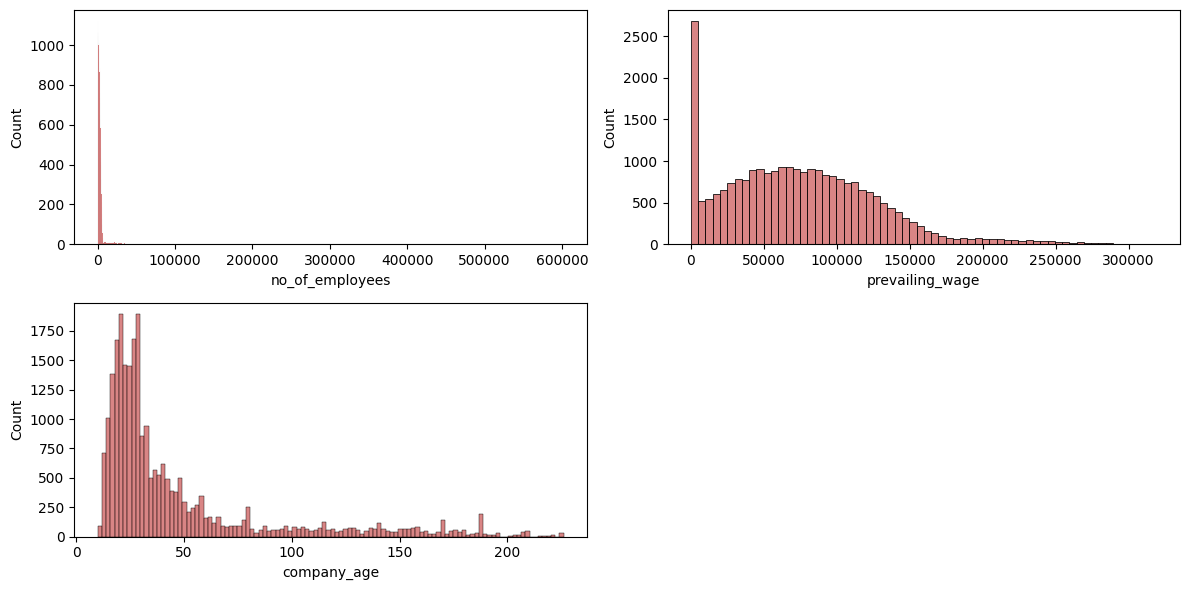

In [74]:
plt.figure(figsize = (12, 6))
for i, col in enumerate(["no_of_employees", "prevailing_wage", "company_age"]):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()


### Apply Power Transformer to check if it can reduces the outliers

In [75]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method ='yeo-johnson')
transform_features =['company_age', 'no_of_employees']
X_copy = pt.fit_transform(X[transform_features])

In [76]:
X_copy =pd.DataFrame(X_copy, columns =transform_features )

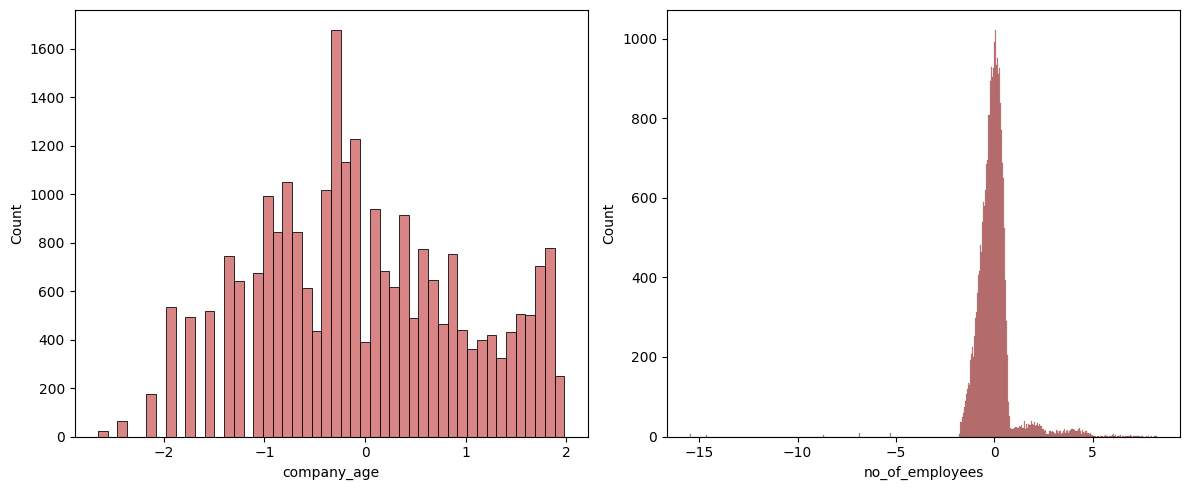

In [77]:
plt.figure(figsize = (12,5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [78]:
X_copy.skew(axis=0, skipna=True)

company_age        0.120823
no_of_employees    0.399339
dtype: float64

#### Encoding and Scaling

In [79]:
num_feature = list(X.select_dtypes(exclude="object").columns)
num_feature

['no_of_employees', 'prevailing_wage', 'company_age']

In [80]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status',
       'company_age'],
      dtype='object')

In [81]:
or_columns =['has_job_experience','requires_job_training', 'full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment' ]
transform_columns =['no_of_employees','company_age']

from sklearn.preprocessing import OneHotEncoder,StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
        ("transformer", PowerTransformer(method="yeo-johnson"))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_feature)   
    ]
)

In [82]:
X = preprocessor.fit_transform(X)

In [83]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

#### Classification

In [84]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required
smt = SMOTEENN(random_state=42, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X, y)

In [99]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13644, 24), (3412, 24))

In [85]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score,roc_auc_score, f1_score, roc_curve

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
    

In [86]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return acc, f1, precision, recall, roc_auc

In [87]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(),
    "Support Vactor classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [88]:
from sklearn.model_selection import train_test_split
def evaluate_models(X, y, models):
    """
    This function takes X and y and models dictionary as input
    It splits the data into Train Test Spilt
    Iterates through the given model dictionary and evaluates the metrics
    Returns : Dataframe which contains report of all models metrics with cost
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    
    models_list=[]
    accuracy_list =[]
    auc = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        model_train_accuracy, model_train_f1, model_train_precision, \
        model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)
        
        model_test_accuracy, model_test_f1, model_test_precision, \
        model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        
        print("Model performance for Training set")
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print("- F1 Score: {:.4f}".format(model_train_f1))
        print("- Precision: {:.4f}".format(model_train_precision))
        print("- Recall: {:.4f}".format(model_train_recall))
        print("- ROC AUC score: {:.4f}".format(model_train_rocauc_score))
        
        print("=================================================")
        
        print("Model performance for Test set")
        print("- Accuracy: {:.4f}".format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print("- F1 Score: {:.4f}".format(model_test_f1))
        print("- Precision: {:.4f}".format(model_test_precision))
        print("- Recall: {:.4f}".format(model_test_recall))
        print("- ROC AUC score: {:.4f}".format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print("="*35)
        print("\n")
        
    report =pd.DataFrame(list(zip(models_list, accuracy_list)), columns = ["Model Name", "Accuracy"]).sort_values(by=['Accuracy'], ascending=False)
    
    return report

In [89]:
base_model_report = evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC score: 1.0000
Model performance for Test set
- Accuracy: 0.9537
- F1 Score: 0.9572
- Precision: 0.9567
- Recall: 0.9577
- ROC AUC score: 0.9533


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC score: 1.0000
Model performance for Test set
- Accuracy: 0.9270
- F1 Score: 0.9325
- Precision: 0.9333
- Recall: 0.9317
- ROC AUC score: 0.9266


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8860
- F1 Score: 0.8944
- Precision: 0.8941
- Recall: 0.8946
- ROC AUC score: 0.8852
Model performance for Test set
- Accuracy: 0.8933
- F1 Score: 0.9011
- Precision: 0.9040
- Recall: 0.8982
- ROC AUC score: 0.8929


Logistic Regression
Model performance for Training set
- Accuracy: 0.7375
- F1 Score: 0.7528
- Precision: 0.7655
- Recall: 0.7406
- ROC AUC score: 0.7373
Mo

In [90]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.953693
4,K-Neighbors Classifier,0.941090
5,XGBClassifier,0.936401
6,CatBoosting Classifier,0.928195
1,Decision Tree,0.927022
2,Gradient Boosting,0.893318
7,Support Vactor classifier,0.873681
8,AdaBoost Classifier,0.860785
3,Logistic Regression,0.737104


In [91]:
# Intialize few parameter for Hyperparameter tuning
xgboost_params = {
    'max_depth': range(3, 10, 2),
    'min_child_weight':range(1, 6, 2)
}
    
rf_params = {
    'max_depth': [10, 12, None, 15, 20],
    'max_features': ['sqrt', 'log2', None],
    'n_estimators': [10, 50, 100, 200]
}

knn_parmas = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights": ['uniform', 'distance'],
    'n_neighbors': [3, 4, 5, 7, 9],
    
}

In [92]:
randomCV_models = [
    ("XGBoost", XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_parmas)
]

In [93]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomCV_models:
    random = RandomizedSearchCV(estimator= model,
                                param_distributions= params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"================ Best Params for {model_name} ===============")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
================ Best Params for XGBoost ===============
{'min_child_weight': 1, 'max_depth': 9}
================ Best Params for RF ===============
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}
================ Best Params for KNN ===============
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [94]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

In [95]:
from sklearn.metrics import roc_auc_score, roc_curve

best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param["RF"]),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param["KNN"]),
    "XGBClassifier": XGBClassifier(**model_param["XGBoost"], n_jobs= -1),
}

tuned_report = evaluate_models(X=X_res, y=y_res, models=best_models)


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC score: 1.0000
Model performance for Test set
- Accuracy: 0.9531
- F1 Score: 0.9567
- Precision: 0.9567
- Recall: 0.9567
- ROC AUC score: 0.9528


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC score: 1.0000
Model performance for Test set
- Accuracy: 0.9719
- F1 Score: 0.9743
- Precision: 0.9620
- Recall: 0.9870
- ROC AUC score: 0.9705


XGBClassifier
Model performance for Training set
- Accuracy: 0.9994
- F1 Score: 0.9995
- Precision: 0.9993
- Recall: 0.9996
- ROC AUC score: 0.9994
Model performance for Test set
- Accuracy: 0.9461
- F1 Score: 0.9501
- Precision: 0.9521
- Recall: 0.9480
- ROC AUC score: 0.9459




In [96]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.971864
0,Random Forest Classifier,0.953107
2,XGBClassifier,0.946073


In [100]:
best_model = KNeighborsClassifier(**model_param["KNN"])

best_model = best_model.fit(X_train, y_train )

y_pred = best_model.predict(X_test)

score = accuracy_score(y_test, y_pred)

cr = classification_report(y_test, y_pred)

print("Final Model 'KNN' ")
print("Accurcy Score value: {:.4f}".format(score))
print(cr)


Final Model 'KNN' 
Accurcy Score value: 0.9719
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1566
           1       0.96      0.99      0.97      1846

    accuracy                           0.97      3412
   macro avg       0.97      0.97      0.97      3412
weighted avg       0.97      0.97      0.97      3412

